<a href="https://colab.research.google.com/github/benbaz-2/comp551/blob/main/assignment1_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Package imports

In [ ]:
pip install ucimlrepo;

In [ ]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split
import pdb
import time

### Importing data

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

### Data cleaning and exploratory data analysis

In [ ]:
# Taking a look at the data
# The data looks like it was already processed
pd.set_option('display.max_columns', None)
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


In [ ]:
y.head()

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Checking for missing values
# Great, no missing values
X.isnull().sum()

,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


In [ ]:
y.isnull().sum()

,0
Diabetes_binary,0


In [ ]:
# looking at descriptive statistics and variable distributions
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
#X.hist(figsize=(20,20));

In [ ]:
# scaling data
numerical = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
for n in numerical:
    values = np.array(X[n])
    mean = np.mean(values)
    std = np.std(values)
    X.loc[:, n] = (values - mean) / std
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,1.757936,1,0,0,0,0,1,0,1,0,2.329121,1.998592,1.233999,1,0,0.316900,-1.065595,-1.474487
1,0,0,0,-0.511806,1,0,0,1,0,0,0,0,1,0.457294,-0.429630,-0.486592,0,0,-0.337933,0.963272,-2.440138
2,1,1,1,-0.057858,0,0,0,0,1,0,0,1,1,2.329121,3.617407,2.954590,1,0,0.316900,-1.065595,0.939638
3,1,0,1,-0.209174,0,0,0,1,1,1,0,1,0,-0.478619,-0.429630,-0.486592,0,0,0.971733,-2.080028,-0.026012
4,1,1,1,-0.663122,0,0,0,1,1,1,0,1,0,-0.478619,-0.024926,-0.486592,0,0,0.971733,-0.051162,-0.991662


In [ ]:
#X.hist(figsize=(20,20))


Class distribution:
{0: 0.8606669820245979, 1: 0.13933301797540207}


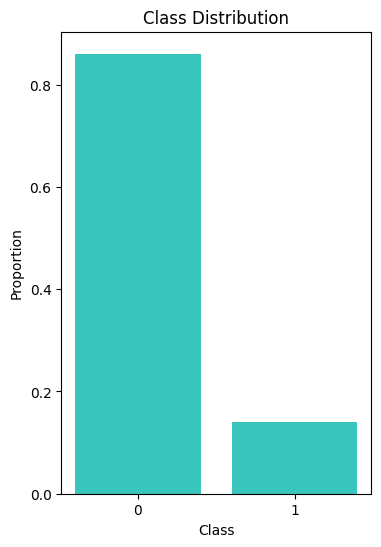

In [ ]:
# Calculate class distribution
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts / len(y)))

print("\nClass distribution:")
print(class_distribution)

# Visualize class distribution
plt.figure(figsize=(4, 6))
plt.bar([str(k) for k in class_distribution.keys()], class_distribution.values(), color = "#39C5BB")
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.show()

array([[<Axes: title={'center': 'Diabetes_binary'}>]], dtype=object)

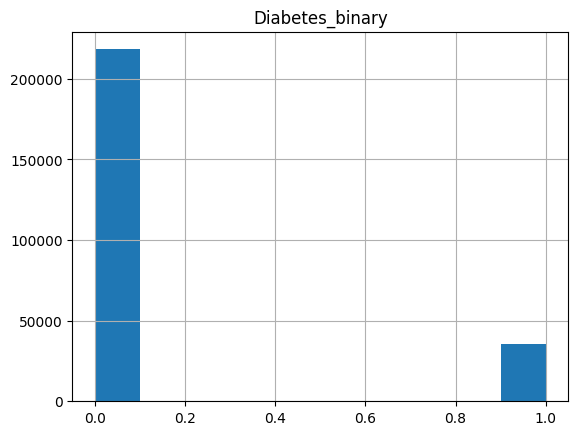

In [ ]:
# Looking at the distribution of the dependant variable
# The data set is not balanced (which makes sense)
y.hist()

<Axes: >

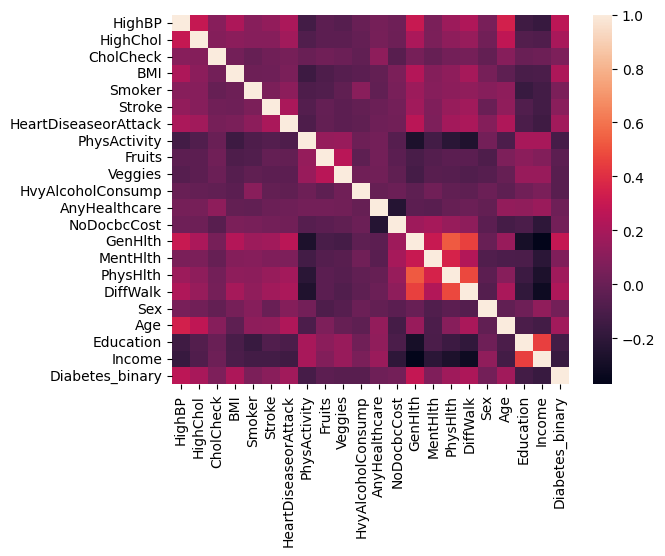

In [ ]:
# looking at correlations
combined = pd.concat([X, y], axis=1)
corr = combined.corr()
sns.heatmap(corr)

### Implementing the model

In [ ]:
class LogisticRegression:
    # modified epsilon because too slow
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-3, max_iters=1e5, verbose=False, get_time=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose

    def logistic(self, z):
        return 1 / (1 + np.exp(-z))

    def cost(self, x, y):                              # Entropy loss
        return np.mean(y * np.log1p(np.exp(-np.dot(x, self.w))) + (1-y) * np.log1p(np.exp(np.dot(x, self.w))))

    def gradient(self, x, y):
        return np.dot(x.T, self.logistic(np.dot(x, self.w)) - y) / len(y)

    def fit(self, x, y, batch_size=False):
        x = np.array(x)
        y = np.array(y)
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros((D, 1))
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        start = time.time()                                             # This is to get the time for gradient descent to run
        if not batch_size:                                              # This is for full batch gradient descent
          while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
              g = self.gradient(x, y)
              self.w = self.w - self.learning_rate * g
              t += 1
        else:                                                           # This is for mini-batch gradient descent
          while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
              g = self.gradient(np.array(pd.DataFrame(x).sample(n=batch_size, replace=True)), np.array(pd.DataFrame(y).sample(n=batch_size, replace=True)))
              self.w = self.w - self.learning_rate * g
              t += 1
        end = time.time()

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'time taken: {end - start}\n')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = self.logistic(np.dot(x,self.w))            #predict output
        return yh


### Fitting the data

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(verbose=True)
#model.fit(X_train, y_train)

In [ ]:
yh = model.predict(X_test)

AttributeError: 'LogisticRegression' object has no attribute 'w'

### Measuring performance

In [ ]:
# Very similar, which is good but apparently this is an average value so the model could be optimized
entropy = lambda y, yh: np.mean(y * np.log1p(yh) + (1-y) * np.log1p(1 - yh))
yh_train = model.predict(X_train)
entropy(y_test, yh), entropy(y_train, yh_train)

In [ ]:
# True positive and false negatives
yh =model.predict(X_test)
yh = pd.DataFrame(yh)
y_test = pd.DataFrame(y_test).reset_index(drop=True)
y1 = pd.DataFrame()
y1['actual'] = y_test
y1['predicted'] = [1 if x >= .5 else 0 for x in yh[0]]
y1['correct'] = (y1['actual'] == y1['predicted']).astype(int)
correct = sum(y1['correct'])
wrong = len(y1) - correct
total = len(y1)
true_positive = sum((y1['predicted'] == 1) & (y1['actual'] == 1))
true_negative = sum((y1['predicted'] == 0) & (y1['actual'] == 0))
false_positive = sum((y1['predicted'] == 1) & (y1['actual'] == 0))
false_negative = sum((y1['predicted'] == 0) & (y1['actual'] == 1))
print(f'total: {total}, correct: {correct}, wrong: {wrong}, accuracy: {correct/total}')
confusion_matrix = pd.DataFrame(
    [[true_negative, false_positive],
     [false_negative, true_positive]],
    index=['Actual Negative', 'Actual Positive'],
    columns=['Predicted Negative', 'Predicted Positive'])
confusion_matrix

In [ ]:
# Heavy alcohol consumption protects against diabetes according to our model...
weights = pd.DataFrame(model.w, index=(list(X.columns)) + ['Bias'], columns=['weights'])
weights.sort_values('weights', ascending=False)

In [ ]:
# Taking a look at the effect of size of training data

# Train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#y_train_costs = []                                                                          # average value of cost function in training set
#y_test_costs = []                                                                           # average value of cost function in test set
#train_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]                                  # size of training set

# This will take forever
#for i in train_size:
#  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1-i, random_state=42) # Train-test split
#  model = LogisticRegression()                                                                # Initialize model
#  model.fit(x_train, y_train)                                                               # Fit model
#  yh_train = model.predict(x_test)
#  yh_test = model.predict(x_test)

#  cost_train = np.mean((y_train - model.predict(x_train)) ** 2)                             # calculating mean l2 loss
#  cost_test = np.mean((y_test - model.predict(x_test)) ** 2)
#  y_train_costs.append(cost_train)                                                          # appending to list
#  y_test_costs.append(cost_test)

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))                                       # Plotting l2 loss as a function of training set size
#ax1.plot(train_size, y_train_costs, label='train')                                          # for both train and test sets
#ax2.plot(train_size, y_test_costs, label='test')
#ax1.set_xlabel('train size')
#ax2.set_xlabel('train size')
#ax1.set_ylabel('loss')
#ax2.set_ylabel('loss')
#ax1.set_title('train')
#ax2.set_title('test')

### Experiments

In [ ]:
# Minibatch SGD
# Need to finish this

sizes = [2, 4, 8, 16, 32, 64, 128, y_train.shape[0]]
yhs = []

for s in sizes:
  model = LogisticRegression(verbose=True)
  model.fit(X_train, y_train, batch_size=s)
  yh = model.predict(X_test)
  yhs.append(yh)


terminated after 100000 iterations, with norm of the gradient equal to 0.6131597771844282
time taken: 53.529608964920044

terminated after 100000 iterations, with norm of the gradient equal to 0.6915247204490987
time taken: 54.0048348903656

terminated after 100000 iterations, with norm of the gradient equal to 0.48784808481263386
time taken: 59.64071822166443

terminated after 100000 iterations, with norm of the gradient equal to 0.2543773113622504
time taken: 60.09853482246399

terminated after 100000 iterations, with norm of the gradient equal to 0.18661400610416146
time taken: 64.62620878219604

terminated after 100000 iterations, with norm of the gradient equal to 0.14882305545720986
time taken: 66.58935236930847

terminated after 100000 iterations, with norm of the gradient equal to 0.14764320159527283
time taken: 65.42820620536804



In [ ]:
#Different learning rates
# Need to finish this

learning_rates = [.01, .1, .5, 1]

yhs = []
for l in learning_rates:
  model = LogisticRegression(learning_rate=l, verbose=True)
  model.fit(X_train, y_train)
  yh = model.predict(X_test)
  yhs.append(yh)